In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
df=pd.read_csv("../datatraining.csv", sep=";")
test=pd.read_csv("../datatest.csv", sep=";")

In [3]:
class_name='Occupancy'
attributes = [col for col in df.columns if 
              col == 'Temperature'
              or col == 'Humidity'
              or col == 'Light'
              or col == 'CO2'
             ]
X_train = df[attributes]
y_train = df[class_name]

X_test=test[attributes]
y_test = df[class_name]

In [5]:
X_trainv=X_train.values
X_testv=X_test.values

In [26]:
import warnings
warnings.simplefilter("ignore")

In [34]:
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [35]:
clf.decision_scores_

array([11.35807132,  8.98006716,  9.01432887, ..., 14.93316862,
       14.01599245, 15.99986562])

In [36]:
anomlay_score = clf.decision_function(X_train)

In [37]:
outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([7495,  648]))

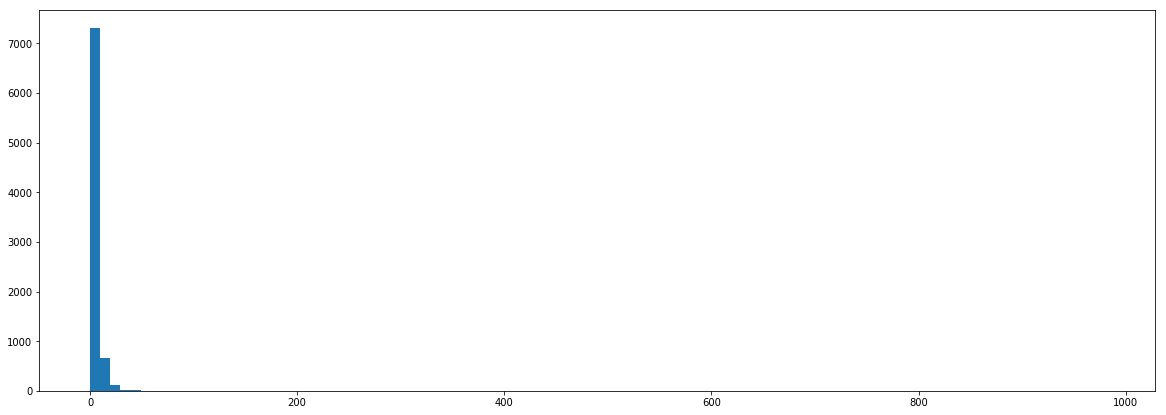

In [38]:
plt.figure(figsize=(20,7))
plt.hist(clf.decision_scores_, bins=100)
#plt.axvline(min, c='k')
plt.show()

In [39]:
np.mean(anomlay_score[np.where(outliers==1)])

20.64752968963714

In [40]:
np.mean(anomlay_score[np.where(outliers==0)])

1.960553706111737

In [41]:
np.mean(clf.decision_scores_[np.where(outliers==1)])

22.570722897909175

In [42]:
np.mean(clf.decision_scores_[np.where(outliers==0)])

2.3041358579178195

In [43]:
clf = LOF()
clf.fit(X_train)

outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([7428,  715]))

In [44]:
clf = AutoEncoder(hidden_neurons=[4, 32, 32, 4], epochs=20)

In [45]:
clf.fit(X_train)

outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
________________________________________________

(array([0, 1]), array([7328,  815]))

In [46]:
anomlay_score = clf.decision_function(X_train)

In [47]:
outliers_proba = clf.predict_proba(X_train)

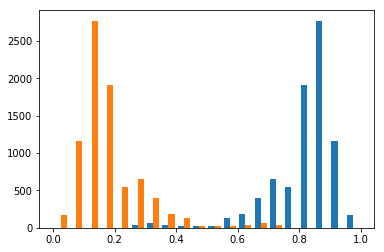

In [48]:
plt.hist(outliers_proba, bins=20)
#plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='k')
plt.show()

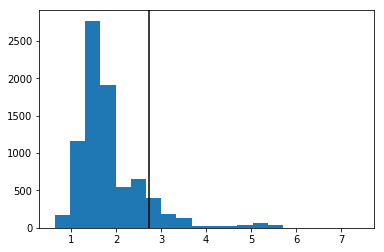

In [49]:
plt.hist(anomlay_score, bins=20)
plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='k')
plt.show()